# Models Tuning

This notebook was run in VScode to view GridSearchCV progress ([ref](https://www.kaggle.com/questions-and-answers/319408)).

Enable auto-reloading of external modules

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

Import dependencies

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [3]:
%cd ../..

/Users/falaaharifkhan/Documents/fairness-variance


In [4]:
import matplotlib
import matplotlib.pyplot as plt
from pprint import pprint

from source.custom_classes.data_loaders import ACSEmploymentDataset
from source.model_tuning_utils import test_baseline_models

plt.style.use('mpl20')
matplotlib.rcParams['figure.dpi'] = 100

In [5]:
try:
    from folktables import ACSDataSource, ACSEmployment
except:
    !pip install folktables
    from folktables import ACSDataSource, ACSEmployment

In [ ]:
DATASET_CONFIG = {
    'state': "GA",
    'year': 2018,
}

In [6]:
STATE = DATASET_CONFIG['state']
YEAR = DATASET_CONFIG['year']
DATASET_NAME = f"Folktables_{STATE}_{YEAR}"
STATE,YEAR

('GA', 2018)

## Loading ACSEmployment data

In [7]:
dataset = ACSEmploymentDataset(state=[STATE], year=YEAR, root_dir='data', with_nulls=False, subsample=20000)

## Tune hyper-parameters and find the best baseline model

Baseline X_train shape:  (16000, 16)
Baseline X_test shape:  (4000, 16)
X_train_features.columns:  Index(['ESP_8', 'SCHL_0', 'CIT_4', 'SCHL_1', 'DREM_1', 'AGEP', 'MAR_2',
       'ESP_2', 'RELP_7', 'RELP_16', 'RELP_9', 'DEAR_2', 'RELP_4', 'RELP_11',
       'SCHL_5', 'DREM_2', 'RELP_5', 'SCHL_11', 'ANC_4', 'SCHL_22', 'RELP_2',
       'NATIVITY_2', 'SCHL_21', 'MIL_1', 'SCHL_7', 'RELP_1', 'SEX_2',
       'RAC1P_6', 'MAR_5', 'ESP_1', 'SCHL_24', 'MAR_1', 'RAC1P_5', 'SCHL_23',
       'SCHL_4', 'RAC1P_1', 'CIT_3', 'SCHL_14', 'DIS_1', 'DIS_2', 'MIG_1',
       'RELP_8', 'RELP_0', 'RELP_6', 'RAC1P_9', 'ESP_7', 'DEYE_1',
       'NATIVITY_1', 'ESP_5', 'ANC_2', 'MIG_2', 'MIL_3', 'CIT_5', 'MIG_0',
       'SCHL_2', 'ANC_1', 'CIT_1', 'RELP_3', 'MAR_3', 'SCHL_10', 'SCHL_15',
       'SCHL_16', 'SCHL_9', 'RELP_13', 'SCHL_13', 'RELP_15', 'ANC_3', 'MAR_4',
       'MIL_0', 'ESP_3', 'RAC1P_2', 'ESP_6', 'SCHL_20', 'SCHL_8', 'SCHL_19',
       'SCHL_12', 'DREM_0', 'RELP_17', 'RELP_12', 'MIG_3', 'DEYE_2', 'SCHL_1

[CV 3/3; 1/400] START C=1e-05, max_iter=50, penalty=l1, solver=newton-cg........
[CV 3/3; 1/400] END C=1e-05, max_iter=50, penalty=l1, solver=newton-cg; Accuracy_Score: (test=nan) F1_Score: (test=nan) total time=   0.0s
[CV 2/3; 4/400] START C=1e-05, max_iter=50, penalty=l1, solver=sag..............
[CV 2/3; 4/400] END C=1e-05, max_iter=50, penalty=l1, solver=sag; Accuracy_Score: (test=nan) F1_Score: (test=nan) total time=   0.0s
[CV 1/3; 5/400] START C=1e-05, max_iter=50, penalty=l1, solver=saga.............
[CV 1/3; 5/400] END C=1e-05, max_iter=50, penalty=l1, solver=saga; Accuracy_Score: (test=0.557) F1_Score: (test=0.358) total time=   0.1s
[CV 3/3; 7/400] START C=1e-05, max_iter=50, penalty=l2, solver=lbfgs............
[CV 3/3; 7/400] END C=1e-05, max_iter=50, penalty=l2, solver=lbfgs; Accuracy_Score: (test=0.541) F1_Score: (test=0.351) total time=   0.1s
[CV 1/3; 9/400] START C=1e-05, max_iter=50, penalty=l2, solver=sag..............
[CV 1/3; 9/400] END C=1e-05, max_iter=50, pena

[CV 2/3; 1/400] START C=1e-05, max_iter=50, penalty=l1, solver=newton-cg........
[CV 2/3; 1/400] END C=1e-05, max_iter=50, penalty=l1, solver=newton-cg; Accuracy_Score: (test=nan) F1_Score: (test=nan) total time=   0.0s
[CV 1/3; 4/400] START C=1e-05, max_iter=50, penalty=l1, solver=sag..............
[CV 1/3; 4/400] END C=1e-05, max_iter=50, penalty=l1, solver=sag; Accuracy_Score: (test=nan) F1_Score: (test=nan) total time=   0.0s
[CV 3/3; 4/400] START C=1e-05, max_iter=50, penalty=l1, solver=sag..............
[CV 3/3; 4/400] END C=1e-05, max_iter=50, penalty=l1, solver=sag; Accuracy_Score: (test=nan) F1_Score: (test=nan) total time=   0.0s
[CV 3/3; 5/400] START C=1e-05, max_iter=50, penalty=l1, solver=saga.............
[CV 3/3; 5/400] END C=1e-05, max_iter=50, penalty=l1, solver=saga; Accuracy_Score: (test=0.541) F1_Score: (test=0.351) total time=   0.0s
[CV 1/3; 7/400] START C=1e-05, max_iter=50, penalty=l2, solver=lbfgs............
[CV 1/3; 7/400] END C=1e-05, max_iter=50, penalty=l2

[CV 1/3; 3/400] START C=1e-05, max_iter=50, penalty=l1, solver=liblinear........
[CV 1/3; 3/400] END C=1e-05, max_iter=50, penalty=l1, solver=liblinear; Accuracy_Score: (test=0.557) F1_Score: (test=0.358) total time=   0.1s
[CV 1/3; 8/400] START C=1e-05, max_iter=50, penalty=l2, solver=liblinear........
[CV 1/3; 8/400] END C=1e-05, max_iter=50, penalty=l2, solver=liblinear; Accuracy_Score: (test=0.568) F1_Score: (test=0.426) total time=   0.1s
[CV 1/3; 11/400] START C=1e-05, max_iter=100, penalty=l1, solver=newton-cg......
[CV 1/3; 11/400] END C=1e-05, max_iter=100, penalty=l1, solver=newton-cg; Accuracy_Score: (test=nan) F1_Score: (test=nan) total time=   0.0s
[CV 3/3; 11/400] START C=1e-05, max_iter=100, penalty=l1, solver=newton-cg......
[CV 3/3; 11/400] END C=1e-05, max_iter=100, penalty=l1, solver=newton-cg; Accuracy_Score: (test=nan) F1_Score: (test=nan) total time=   0.0s
[CV 2/3; 12/400] START C=1e-05, max_iter=100, penalty=l1, solver=lbfgs..........
[CV 2/3; 12/400] END C=1e-0

[CV 2/3; 2/400] START C=1e-05, max_iter=50, penalty=l1, solver=lbfgs............
[CV 2/3; 2/400] END C=1e-05, max_iter=50, penalty=l1, solver=lbfgs; Accuracy_Score: (test=nan) F1_Score: (test=nan) total time=   0.0s
[CV 1/3; 6/400] START C=1e-05, max_iter=50, penalty=l2, solver=newton-cg........
[CV 1/3; 6/400] END C=1e-05, max_iter=50, penalty=l2, solver=newton-cg; Accuracy_Score: (test=0.557) F1_Score: (test=0.358) total time=   0.2s
[CV 2/3; 11/400] START C=1e-05, max_iter=100, penalty=l1, solver=newton-cg......
[CV 2/3; 11/400] END C=1e-05, max_iter=100, penalty=l1, solver=newton-cg; Accuracy_Score: (test=nan) F1_Score: (test=nan) total time=   0.0s
[CV 1/3; 12/400] START C=1e-05, max_iter=100, penalty=l1, solver=lbfgs..........
[CV 1/3; 12/400] END C=1e-05, max_iter=100, penalty=l1, solver=lbfgs; Accuracy_Score: (test=nan) F1_Score: (test=nan) total time=   0.0s
[CV 3/3; 12/400] START C=1e-05, max_iter=100, penalty=l1, solver=lbfgs..........
[CV 3/3; 12/400] END C=1e-05, max_iter=

[CV 3/3; 2/400] START C=1e-05, max_iter=50, penalty=l1, solver=lbfgs............
[CV 3/3; 2/400] END C=1e-05, max_iter=50, penalty=l1, solver=lbfgs; Accuracy_Score: (test=nan) F1_Score: (test=nan) total time=   0.0s
[CV 3/3; 6/400] START C=1e-05, max_iter=50, penalty=l2, solver=newton-cg........
[CV 3/3; 6/400] END C=1e-05, max_iter=50, penalty=l2, solver=newton-cg; Accuracy_Score: (test=0.541) F1_Score: (test=0.351) total time=   0.1s
[CV 2/3; 8/400] START C=1e-05, max_iter=50, penalty=l2, solver=liblinear........
[CV 2/3; 8/400] END C=1e-05, max_iter=50, penalty=l2, solver=liblinear; Accuracy_Score: (test=0.575) F1_Score: (test=0.447) total time=   0.1s
[CV 2/3; 10/400] START C=1e-05, max_iter=50, penalty=l2, solver=saga............
[CV 2/3; 10/400] END C=1e-05, max_iter=50, penalty=l2, solver=saga; Accuracy_Score: (test=0.554) F1_Score: (test=0.357) total time=   0.3s
[CV 3/3; 17/400] START C=1e-05, max_iter=100, penalty=l2, solver=lbfgs..........
[CV 3/3; 17/400] END C=1e-05, max_i

[CV 1/3; 2/400] START C=1e-05, max_iter=50, penalty=l1, solver=lbfgs............
[CV 1/3; 2/400] END C=1e-05, max_iter=50, penalty=l1, solver=lbfgs; Accuracy_Score: (test=nan) F1_Score: (test=nan) total time=   0.0s
[CV 2/3; 6/400] START C=1e-05, max_iter=50, penalty=l2, solver=newton-cg........
[CV 2/3; 6/400] END C=1e-05, max_iter=50, penalty=l2, solver=newton-cg; Accuracy_Score: (test=0.554) F1_Score: (test=0.357) total time=   0.1s
[CV 2/3; 9/400] START C=1e-05, max_iter=50, penalty=l2, solver=sag..............
[CV 2/3; 9/400] END C=1e-05, max_iter=50, penalty=l2, solver=sag; Accuracy_Score: (test=0.554) F1_Score: (test=0.357) total time=   0.3s
[CV 1/3; 17/400] START C=1e-05, max_iter=100, penalty=l2, solver=lbfgs..........
[CV 1/3; 17/400] END C=1e-05, max_iter=100, penalty=l2, solver=lbfgs; Accuracy_Score: (test=0.557) F1_Score: (test=0.358) total time=   0.1s
[CV 2/3; 18/400] START C=1e-05, max_iter=100, penalty=l2, solver=liblinear......
[CV 2/3; 18/400] END C=1e-05, max_iter=

[CV 1/3; 164/400] START C=0.01, max_iter=100, penalty=l1, solver=sag............
[CV 1/3; 164/400] END C=0.01, max_iter=100, penalty=l1, solver=sag; Accuracy_Score: (test=nan) F1_Score: (test=nan) total time=   0.0s
[CV 2/3; 164/400] START C=0.01, max_iter=100, penalty=l1, solver=sag............
[CV 2/3; 164/400] END C=0.01, max_iter=100, penalty=l1, solver=sag; Accuracy_Score: (test=nan) F1_Score: (test=nan) total time=   0.0s
[CV 3/3; 164/400] START C=0.01, max_iter=100, penalty=l1, solver=sag............
[CV 3/3; 164/400] END C=0.01, max_iter=100, penalty=l1, solver=sag; Accuracy_Score: (test=nan) F1_Score: (test=nan) total time=   0.0s
[CV 2/3; 166/400] START C=0.01, max_iter=100, penalty=l2, solver=newton-cg......
[CV 2/3; 166/400] END C=0.01, max_iter=100, penalty=l2, solver=newton-cg; Accuracy_Score: (test=0.796) F1_Score: (test=0.796) total time=   0.3s
[CV 3/3; 166/400] START C=0.01, max_iter=100, penalty=l2, solver=newton-cg......
[CV 3/3; 166/400] END C=0.01, max_iter=100, p

2023/01/16, 21:11:26: Tuning for LogisticRegression is finished
####################  Folktables_GA_2018  ####################
Test model:  LogisticRegression
Test model parameters:
{'C': 1, 'max_iter': 150, 'penalty': 'l2', 'solver': 'lbfgs'}

              precision    recall  f1-score   support

           0      0.860     0.804     0.831      2200
           1      0.778     0.841     0.808      1800

    accuracy                          0.820      4000
   macro avg      0.819     0.822     0.820      4000
weighted avg      0.823     0.820     0.821      4000



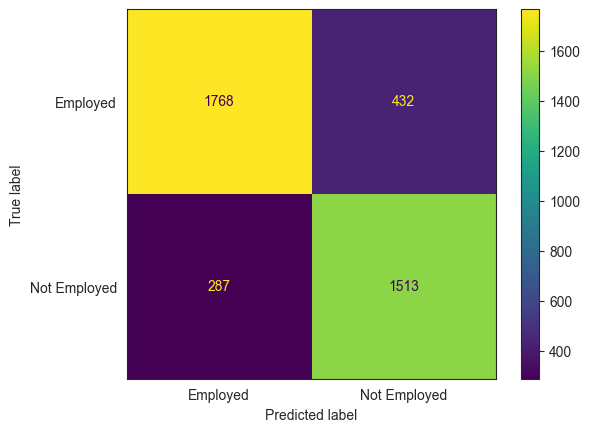

2023/01/16, 21:11:26: Tuning DecisionTreeClassifier...
Fitting 3 folds for each of 80 candidates, totalling 240 fits
[CV 2/3; 3/400] START C=1e-05, max_iter=50, penalty=l1, solver=liblinear........
[CV 2/3; 3/400] END C=1e-05, max_iter=50, penalty=l1, solver=liblinear; Accuracy_Score: (test=0.554) F1_Score: (test=0.357) total time=   0.1s
[CV 3/3; 8/400] START C=1e-05, max_iter=50, penalty=l2, solver=liblinear........
[CV 3/3; 8/400] END C=1e-05, max_iter=50, penalty=l2, solver=liblinear; Accuracy_Score: (test=0.556) F1_Score: (test=0.415) total time=   0.0s
[CV 3/3; 10/400] START C=1e-05, max_iter=50, penalty=l2, solver=saga............
[CV 3/3; 10/400] END C=1e-05, max_iter=50, penalty=l2, solver=saga; Accuracy_Score: (test=0.541) F1_Score: (test=0.351) total time=   0.1s
[CV 2/3; 14/400] START C=1e-05, max_iter=100, penalty=l1, solver=sag............
[CV 2/3; 14/400] END C=1e-05, max_iter=100, penalty=l1, solver=sag; Accuracy_Score: (test=nan) F1_Score: (test=nan) total time=   0.0s

[CV 3/3; 302/400] END C=10, max_iter=50, penalty=l1, solver=lbfgs; Accuracy_Score: (test=nan) F1_Score: (test=nan) total time=   0.0s
[CV 1/3; 303/400] START C=10, max_iter=50, penalty=l1, solver=liblinear.........
[CV 1/3; 303/400] END C=10, max_iter=50, penalty=l1, solver=liblinear; Accuracy_Score: (test=0.805) F1_Score: (test=0.805) total time=   2.6s
[CV 3/3; 307/400] START C=10, max_iter=50, penalty=l2, solver=lbfgs.............
[CV 3/3; 307/400] END C=10, max_iter=50, penalty=l2, solver=lbfgs; Accuracy_Score: (test=0.798) F1_Score: (test=0.798) total time=   0.1s
[CV 1/3; 308/400] START C=10, max_iter=50, penalty=l2, solver=liblinear.........
[CV 1/3; 308/400] END C=10, max_iter=50, penalty=l2, solver=liblinear; Accuracy_Score: (test=0.805) F1_Score: (test=0.804) total time=   0.4s
[CV 1/3; 310/400] START C=10, max_iter=50, penalty=l2, solver=saga..............
[CV 1/3; 310/400] END C=10, max_iter=50, penalty=l2, solver=saga; Accuracy_Score: (test=0.805) F1_Score: (test=0.804) to

2023/01/16, 21:11:28: Tuning for DecisionTreeClassifier is finished
####################  Folktables_GA_2018  ####################
Test model:  DecisionTreeClassifier
Test model parameters:
{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 0.6,
 'min_samples_split': 0.1}

              precision    recall  f1-score   support

           0      0.867     0.819     0.842      2200
           1      0.793     0.846     0.819      1800

    accuracy                          0.831      4000
   macro avg      0.830     0.833     0.830      4000
weighted avg      0.833     0.831     0.832      4000



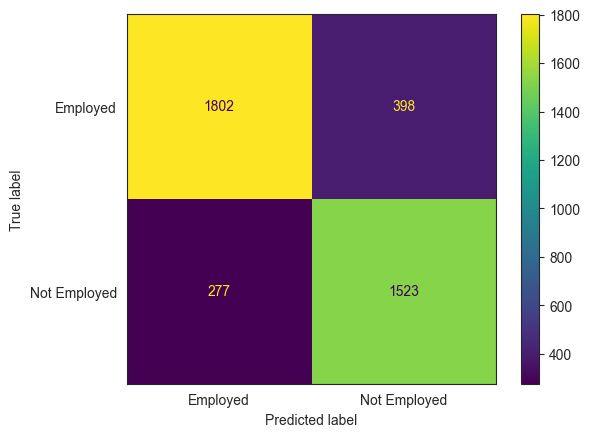

2023/01/16, 21:11:28: Tuning RandomForestClassifier...
Fitting 3 folds for each of 144 candidates, totalling 432 fits
[CV 1/3; 207/400] START C=0.1, max_iter=50, penalty=l2, solver=lbfgs............
[CV 1/3; 207/400] END C=0.1, max_iter=50, penalty=l2, solver=lbfgs; Accuracy_Score: (test=0.803) F1_Score: (test=0.802) total time=   0.2s
[CV 2/3; 207/400] START C=0.1, max_iter=50, penalty=l2, solver=lbfgs............
[CV 2/3; 207/400] END C=0.1, max_iter=50, penalty=l2, solver=lbfgs; Accuracy_Score: (test=0.813) F1_Score: (test=0.812) total time=   0.2s
[CV 2/3; 218/400] START C=0.1, max_iter=100, penalty=l2, solver=liblinear.......
[CV 2/3; 218/400] END C=0.1, max_iter=100, penalty=l2, solver=liblinear; Accuracy_Score: (test=0.813) F1_Score: (test=0.812) total time=   0.1s
[CV 3/3; 218/400] START C=0.1, max_iter=100, penalty=l2, solver=liblinear.......
[CV 3/3; 218/400] END C=0.1, max_iter=100, penalty=l2, solver=liblinear; Accuracy_Score: (test=0.798) F1_Score: (test=0.798) total time=

[CV 1/3; 218/400] END C=0.1, max_iter=100, penalty=l2, solver=liblinear; Accuracy_Score: (test=0.803) F1_Score: (test=0.802) total time=   0.2s
[CV 2/3; 226/400] START C=0.1, max_iter=150, penalty=l2, solver=newton-cg.......
[CV 2/3; 226/400] END C=0.1, max_iter=150, penalty=l2, solver=newton-cg; Accuracy_Score: (test=0.814) F1_Score: (test=0.813) total time=   0.5s
[CV 3/3; 226/400] START C=0.1, max_iter=150, penalty=l2, solver=newton-cg.......
[CV 3/3; 226/400] END C=0.1, max_iter=150, penalty=l2, solver=newton-cg; Accuracy_Score: (test=0.798) F1_Score: (test=0.798) total time=   0.2s
[CV 1/3; 227/400] START C=0.1, max_iter=150, penalty=l2, solver=lbfgs...........
[CV 1/3; 227/400] END C=0.1, max_iter=150, penalty=l2, solver=lbfgs; Accuracy_Score: (test=0.803) F1_Score: (test=0.802) total time=   0.4s
[CV 2/3; 227/400] START C=0.1, max_iter=150, penalty=l2, solver=lbfgs...........
[CV 2/3; 227/400] END C=0.1, max_iter=150, penalty=l2, solver=lbfgs; Accuracy_Score: (test=0.814) F1_Sco

[CV 2/3; 199/400] START C=0.01, max_iter=250, penalty=l2, solver=sag............
[CV 2/3; 199/400] END C=0.01, max_iter=250, penalty=l2, solver=sag; Accuracy_Score: (test=0.796) F1_Score: (test=0.796) total time=   0.3s
[CV 1/3; 209/400] START C=0.1, max_iter=50, penalty=l2, solver=sag..............
[CV 1/3; 209/400] END C=0.1, max_iter=50, penalty=l2, solver=sag; Accuracy_Score: (test=0.803) F1_Score: (test=0.802) total time=   0.6s
[CV 2/3; 209/400] START C=0.1, max_iter=50, penalty=l2, solver=sag..............
[CV 2/3; 209/400] END C=0.1, max_iter=50, penalty=l2, solver=sag; Accuracy_Score: (test=0.814) F1_Score: (test=0.813) total time=   0.3s
[CV 3/3; 209/400] START C=0.1, max_iter=50, penalty=l2, solver=sag..............
[CV 3/3; 209/400] END C=0.1, max_iter=50, penalty=l2, solver=sag; Accuracy_Score: (test=0.798) F1_Score: (test=0.798) total time=   0.2s
[CV 1/3; 210/400] START C=0.1, max_iter=50, penalty=l2, solver=saga.............
[CV 1/3; 210/400] END C=0.1, max_iter=50, pen

[CV 3/3; 229/400] START C=0.1, max_iter=150, penalty=l2, solver=sag.............
[CV 3/3; 229/400] END C=0.1, max_iter=150, penalty=l2, solver=sag; Accuracy_Score: (test=0.798) F1_Score: (test=0.798) total time=   0.2s
[CV 1/3; 230/400] START C=0.1, max_iter=150, penalty=l2, solver=saga............
[CV 1/3; 230/400] END C=0.1, max_iter=150, penalty=l2, solver=saga; Accuracy_Score: (test=0.803) F1_Score: (test=0.802) total time=   1.3s
[CV 2/3; 255/400] START C=1, max_iter=50, penalty=l1, solver=saga...............
[CV 2/3; 255/400] END C=1, max_iter=50, penalty=l1, solver=saga; Accuracy_Score: (test=0.815) F1_Score: (test=0.814) total time=   1.0s
[CV 1/3; 256/400] START C=1, max_iter=50, penalty=l2, solver=newton-cg..........
[CV 1/3; 256/400] END C=1, max_iter=50, penalty=l2, solver=newton-cg; Accuracy_Score: (test=0.805) F1_Score: (test=0.804) total time=   1.3s
[CV 2/3; 262/400] START C=1, max_iter=100, penalty=l1, solver=lbfgs.............
[CV 2/3; 262/400] END C=1, max_iter=100, 

[CV 2/3; 307/400] END C=10, max_iter=50, penalty=l2, solver=lbfgs; Accuracy_Score: (test=0.817) F1_Score: (test=0.816) total time=   0.2s
[CV 2/3; 308/400] START C=10, max_iter=50, penalty=l2, solver=liblinear.........
[CV 2/3; 308/400] END C=10, max_iter=50, penalty=l2, solver=liblinear; Accuracy_Score: (test=0.816) F1_Score: (test=0.815) total time=   0.2s
[CV 2/3; 309/400] START C=10, max_iter=50, penalty=l2, solver=sag...............
[CV 2/3; 309/400] END C=10, max_iter=50, penalty=l2, solver=sag; Accuracy_Score: (test=0.816) F1_Score: (test=0.815) total time=   0.7s
[CV 1/3; 311/400] START C=10, max_iter=100, penalty=l1, solver=newton-cg........
[CV 1/3; 311/400] END C=10, max_iter=100, penalty=l1, solver=newton-cg; Accuracy_Score: (test=nan) F1_Score: (test=nan) total time=   0.0s
[CV 2/3; 311/400] START C=10, max_iter=100, penalty=l1, solver=newton-cg........
[CV 2/3; 311/400] END C=10, max_iter=100, penalty=l1, solver=newton-cg; Accuracy_Score: (test=nan) F1_Score: (test=nan) t

[CV 3/3; 321/400] END C=10, max_iter=150, penalty=l1, solver=newton-cg; Accuracy_Score: (test=nan) F1_Score: (test=nan) total time=   0.0s
[CV 1/3; 322/400] START C=10, max_iter=150, penalty=l1, solver=lbfgs............
[CV 1/3; 322/400] END C=10, max_iter=150, penalty=l1, solver=lbfgs; Accuracy_Score: (test=nan) F1_Score: (test=nan) total time=   0.0s
[CV 3/3; 322/400] START C=10, max_iter=150, penalty=l1, solver=lbfgs............
[CV 3/3; 322/400] END C=10, max_iter=150, penalty=l1, solver=lbfgs; Accuracy_Score: (test=nan) F1_Score: (test=nan) total time=   0.0s
[CV 2/3; 323/400] START C=10, max_iter=150, penalty=l1, solver=liblinear........
[CV 2/3; 323/400] END C=10, max_iter=150, penalty=l1, solver=liblinear; Accuracy_Score: (test=0.815) F1_Score: (test=0.815) total time=   2.2s
[CV 1/3; 327/400] START C=10, max_iter=150, penalty=l2, solver=lbfgs............
[CV 1/3; 327/400] END C=10, max_iter=150, penalty=l2, solver=lbfgs; Accuracy_Score: (test=0.805) F1_Score: (test=0.805) tota

[CV 3/3; 279/400] END C=1, max_iter=150, penalty=l2, solver=sag; Accuracy_Score: (test=0.800) F1_Score: (test=0.800) total time=   0.9s
[CV 2/3; 283/400] START C=1, max_iter=200, penalty=l1, solver=liblinear.........
[CV 2/3; 283/400] END C=1, max_iter=200, penalty=l1, solver=liblinear; Accuracy_Score: (test=0.815) F1_Score: (test=0.814) total time=   0.7s
[CV 1/3; 284/400] START C=1, max_iter=200, penalty=l1, solver=sag...............
[CV 1/3; 284/400] END C=1, max_iter=200, penalty=l1, solver=sag; Accuracy_Score: (test=nan) F1_Score: (test=nan) total time=   0.0s
[CV 2/3; 284/400] START C=1, max_iter=200, penalty=l1, solver=sag...............
[CV 2/3; 284/400] END C=1, max_iter=200, penalty=l1, solver=sag; Accuracy_Score: (test=nan) F1_Score: (test=nan) total time=   0.0s
[CV 3/3; 284/400] START C=1, max_iter=200, penalty=l1, solver=sag...............
[CV 3/3; 284/400] END C=1, max_iter=200, penalty=l1, solver=sag; Accuracy_Score: (test=nan) F1_Score: (test=nan) total time=   0.0s
[C

[CV 2/3; 337/400] END C=10, max_iter=200, penalty=l2, solver=lbfgs; Accuracy_Score: (test=0.816) F1_Score: (test=0.815) total time=   0.6s
[CV 1/3; 339/400] START C=10, max_iter=200, penalty=l2, solver=sag..............
[CV 1/3; 339/400] END C=10, max_iter=200, penalty=l2, solver=sag; Accuracy_Score: (test=0.805) F1_Score: (test=0.804) total time=   4.3s
[CV 1/3; 347/400] START C=10, max_iter=250, penalty=l2, solver=lbfgs............
[CV 1/3; 347/400] END C=10, max_iter=250, penalty=l2, solver=lbfgs; Accuracy_Score: (test=0.805) F1_Score: (test=0.805) total time=   1.0s
[CV 2/3; 350/400] START C=10, max_iter=250, penalty=l2, solver=saga.............
[CV 2/3; 350/400] END C=10, max_iter=250, penalty=l2, solver=saga; Accuracy_Score: (test=0.816) F1_Score: (test=0.815) total time=   3.7s
[CV 2/3; 357/400] START C=100, max_iter=50, penalty=l2, solver=lbfgs............
[CV 2/3; 357/400] END C=100, max_iter=50, penalty=l2, solver=lbfgs; Accuracy_Score: (test=0.812) F1_Score: (test=0.812) tot

[CV 2/3; 5/144] START max_depth=3, max_features=0.6, min_samples_leaf=2, n_estimators=50
[CV 2/3; 5/144] END max_depth=3, max_features=0.6, min_samples_leaf=2, n_estimators=50; Accuracy_Score: (test=0.798) F1_Score: (test=0.798) total time=   0.5s
[CV 1/3; 6/144] START max_depth=3, max_features=0.6, min_samples_leaf=2, n_estimators=100
[CV 1/3; 6/144] END max_depth=3, max_features=0.6, min_samples_leaf=2, n_estimators=100; Accuracy_Score: (test=0.796) F1_Score: (test=0.796) total time=   1.4s
[CV 1/3; 7/144] START max_depth=3, max_features=0.6, min_samples_leaf=2, n_estimators=500
[CV 1/3; 7/144] END max_depth=3, max_features=0.6, min_samples_leaf=2, n_estimators=500; Accuracy_Score: (test=0.796) F1_Score: (test=0.796) total time=   6.9s
[CV 2/3; 12/144] START max_depth=3, max_features=0.6, min_samples_leaf=4, n_estimators=700
[CV 2/3; 12/144] END max_depth=3, max_features=0.6, min_samples_leaf=4, n_estimators=700; Accuracy_Score: (test=0.798) F1_Score: (test=0.798) total time=   6.9s


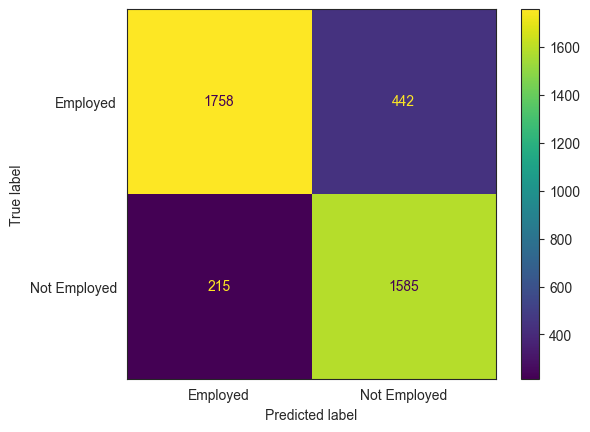

2023/01/16, 21:14:46: Tuning XGBClassifier...
Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 3/3; 12/80] END criterion=gini, max_depth=5, max_features=0.6, min_samples_split=0.1; Accuracy_Score: (test=0.812) F1_Score: (test=0.812) total time=   0.0s
[CV 2/3; 16/80] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=0.1
[CV 2/3; 16/80] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=0.1; Accuracy_Score: (test=0.753) F1_Score: (test=0.753) total time=   0.0s
[CV 3/3; 16/80] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=0.1
[CV 3/3; 16/80] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=0.1; Accuracy_Score: (test=0.751) F1_Score: (test=0.751) total time=   0.0s
[CV 1/3; 25/80] START criterion=gini, max_depth=20, max_features=0.6, min_samples_split=0.01
[CV 1/3; 25/80] END criterion=gini, max_depth=20, max_features=0.6, min_samples_split=0.01; Accuracy_Score: (test=0.813) F1_Score:

[CV 1/3; 4/80] END criterion=gini, max_depth=2, max_features=0.6, min_samples_split=0.1; Accuracy_Score: (test=0.677) F1_Score: (test=0.665) total time=   0.0s
[CV 1/3; 6/80] START criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=0.02
[CV 1/3; 6/80] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=0.02; Accuracy_Score: (test=0.660) F1_Score: (test=0.653) total time=   0.0s
[CV 2/3; 10/80] START criterion=gini, max_depth=5, max_features=0.6, min_samples_split=0.02
[CV 2/3; 10/80] END criterion=gini, max_depth=5, max_features=0.6, min_samples_split=0.02; Accuracy_Score: (test=0.806) F1_Score: (test=0.806) total time=   0.0s
[CV 3/3; 10/80] START criterion=gini, max_depth=5, max_features=0.6, min_samples_split=0.02
[CV 3/3; 10/80] END criterion=gini, max_depth=5, max_features=0.6, min_samples_split=0.02; Accuracy_Score: (test=0.811) F1_Score: (test=0.811) total time=   0.0s
[CV 2/3; 14/80] START criterion=gini, max_depth=5, max_features=sqrt, min_samp

2023/01/16, 21:21:21: Tuning for XGBClassifier is finished
####################  Folktables_GA_2018  ####################
Test model:  XGBClassifier
Test model parameters:
{'lambda': 1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}

              precision    recall  f1-score   support

           0      0.889     0.805     0.845      2200
           1      0.786     0.878     0.829      1800

    accuracy                          0.838      4000
   macro avg      0.838     0.841     0.837      4000
weighted avg      0.843     0.838     0.838      4000



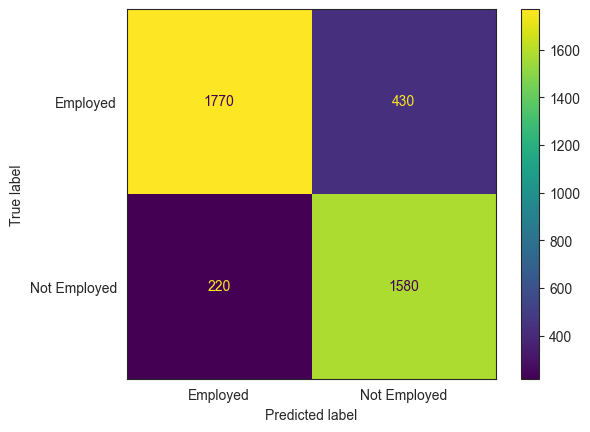

2023/01/16, 21:21:23: Tuning KNeighborsClassifier...
Fitting 3 folds for each of 42 candidates, totalling 126 fits
[CV 3/3; 26/80] END criterion=gini, max_depth=20, max_features=0.6, min_samples_split=0.02; Accuracy_Score: (test=0.798) F1_Score: (test=0.797) total time=   0.0s
[CV 1/3; 27/80] START criterion=gini, max_depth=20, max_features=0.6, min_samples_split=0.05
[CV 1/3; 27/80] END criterion=gini, max_depth=20, max_features=0.6, min_samples_split=0.05; Accuracy_Score: (test=0.819) F1_Score: (test=0.818) total time=   0.1s
[CV 2/3; 27/80] START criterion=gini, max_depth=20, max_features=0.6, min_samples_split=0.05
[CV 2/3; 27/80] END criterion=gini, max_depth=20, max_features=0.6, min_samples_split=0.05; Accuracy_Score: (test=0.824) F1_Score: (test=0.823) total time=   0.1s
[CV 3/3; 35/80] START criterion=gini, max_depth=30, max_features=0.6, min_samples_split=0.05
[CV 3/3; 35/80] END criterion=gini, max_depth=30, max_features=0.6, min_samples_split=0.05; Accuracy_Score: (test=0.8

2023/01/16, 21:21:54: Tuning for KNeighborsClassifier is finished
####################  Folktables_GA_2018  ####################
Test model:  KNeighborsClassifier
Test model parameters:
{'metric': 'minkowski', 'n_neighbors': 25, 'weights': 'uniform'}

              precision    recall  f1-score   support

           0      0.881     0.765     0.819      2200
           1      0.753     0.873     0.808      1800

    accuracy                          0.814      4000
   macro avg      0.817     0.819     0.814      4000
weighted avg      0.823     0.814     0.814      4000



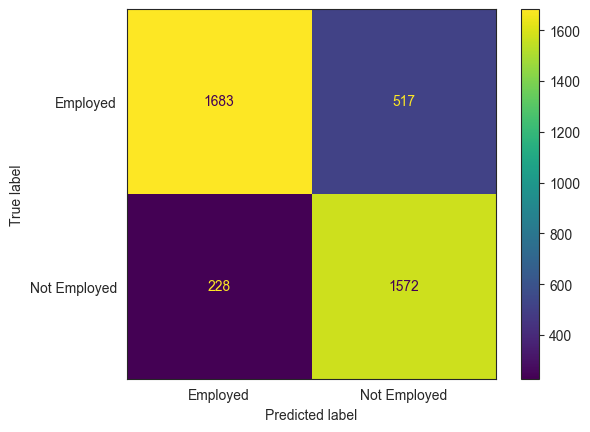

2023/01/16, 21:21:54: Tuning MLPClassifier...
Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV 1/3; 52/80] START criterion=entropy, max_depth=5, max_features=0.6, min_samples_split=0.1
[CV 1/3; 52/80] END criterion=entropy, max_depth=5, max_features=0.6, min_samples_split=0.1; Accuracy_Score: (test=0.803) F1_Score: (test=0.803) total time=   0.1s
[CV 2/3; 52/80] START criterion=entropy, max_depth=5, max_features=0.6, min_samples_split=0.1
[CV 2/3; 52/80] END criterion=entropy, max_depth=5, max_features=0.6, min_samples_split=0.1; Accuracy_Score: (test=0.806) F1_Score: (test=0.806) total time=   0.0s
[CV 3/3; 52/80] START criterion=entropy, max_depth=5, max_features=0.6, min_samples_split=0.1
[CV 3/3; 52/80] END criterion=entropy, max_depth=5, max_features=0.6, min_samples_split=0.1; Accuracy_Score: (test=0.812) F1_Score: (test=0.812) total time=   0.0s
[CV 1/3; 61/80] START criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=0.01
[CV 1/3; 61/80] END c

[CV 2/3; 16/144] START max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=700
[CV 2/3; 16/144] END max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=700; Accuracy_Score: (test=0.756) F1_Score: (test=0.754) total time=   3.5s
[CV 2/3; 21/144] START max_depth=3, max_features=auto, min_samples_leaf=4, n_estimators=50
[CV 2/3; 21/144] END max_depth=3, max_features=auto, min_samples_leaf=4, n_estimators=50; Accuracy_Score: (test=0.765) F1_Score: (test=0.764) total time=   0.3s
[CV 3/3; 21/144] START max_depth=3, max_features=auto, min_samples_leaf=4, n_estimators=50
[CV 3/3; 21/144] END max_depth=3, max_features=auto, min_samples_leaf=4, n_estimators=50; Accuracy_Score: (test=0.750) F1_Score: (test=0.748) total time=   0.2s
[CV 2/3; 22/144] START max_depth=3, max_features=auto, min_samples_leaf=4, n_estimators=100
[CV 2/3; 22/144] END max_depth=3, max_features=auto, min_samples_leaf=4, n_estimators=100; Accuracy_Score: (test=0.751) F1_Score: (test=0.750) total t

[CV 1/3; 16/144] END max_depth=3, max_features=auto, min_samples_leaf=1, n_estimators=700; Accuracy_Score: (test=0.757) F1_Score: (test=0.756) total time=   4.3s
[CV 3/3; 20/144] START max_depth=3, max_features=auto, min_samples_leaf=2, n_estimators=700
[CV 3/3; 20/144] END max_depth=3, max_features=auto, min_samples_leaf=2, n_estimators=700; Accuracy_Score: (test=0.751) F1_Score: (test=0.749) total time=   2.7s
[CV 1/3; 25/144] START max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=50
[CV 1/3; 25/144] END max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=50; Accuracy_Score: (test=0.773) F1_Score: (test=0.773) total time=   0.4s
[CV 2/3; 25/144] START max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=50
[CV 2/3; 25/144] END max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=50; Accuracy_Score: (test=0.765) F1_Score: (test=0.764) total time=   0.3s
[CV 3/3; 26/144] START max_depth=3, max_features=sqrt, min_samples_leaf=1, n_est

[CV 3/3; 32/144] START max_depth=3, max_features=sqrt, min_samples_leaf=2, n_estimators=700
[CV 3/3; 32/144] END max_depth=3, max_features=sqrt, min_samples_leaf=2, n_estimators=700; Accuracy_Score: (test=0.751) F1_Score: (test=0.749) total time=   3.1s
[CV 3/3; 36/144] START max_depth=3, max_features=sqrt, min_samples_leaf=4, n_estimators=700
[CV 3/3; 36/144] END max_depth=3, max_features=sqrt, min_samples_leaf=4, n_estimators=700; Accuracy_Score: (test=0.751) F1_Score: (test=0.749) total time=   3.1s
[CV 2/3; 40/144] START max_depth=4, max_features=0.6, min_samples_leaf=1, n_estimators=700
[CV 2/3; 40/144] END max_depth=4, max_features=0.6, min_samples_leaf=1, n_estimators=700; Accuracy_Score: (test=0.814) F1_Score: (test=0.814) total time=  10.3s
[CV 3/3; 45/144] START max_depth=4, max_features=0.6, min_samples_leaf=4, n_estimators=50
[CV 3/3; 45/144] END max_depth=4, max_features=0.6, min_samples_leaf=4, n_estimators=50; Accuracy_Score: (test=0.810) F1_Score: (test=0.810) total tim

2023/01/16, 21:32:12: Tuning for MLPClassifier is finished
####################  Folktables_GA_2018  ####################
Test model:  MLPClassifier
Test model parameters:
{'activation': 'logistic',
 'hidden_layer_sizes': (100, 50, 100),
 'learning_rate': 'constant',
 'solver': 'lbfgs'}

              precision    recall  f1-score   support

           0      0.871     0.822     0.846      2200
           1      0.796     0.852     0.823      1800

    accuracy                          0.835      4000
   macro avg      0.834     0.837     0.834      4000
weighted avg      0.838     0.835     0.836      4000



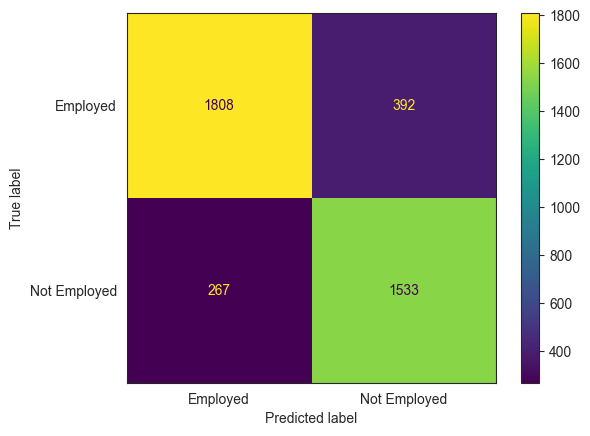

,Dataset_Name,Model_Name,F1_Score,Accuracy_Score,Model_Best_Params
0,Folktables_GA_2018,LogisticRegression,0.819517,0.82025,"{'C': 1, 'max_iter': 150, 'penalty': 'l2', 'so..."
1,Folktables_GA_2018,DecisionTreeClassifier,0.830425,0.83125,"{'criterion': 'gini', 'max_depth': 10, 'max_fe..."
2,Folktables_GA_2018,RandomForestClassifier,0.835442,0.83575,"{'max_depth': 10, 'max_features': 0.6, 'min_sa..."
3,Folktables_GA_2018,XGBClassifier,0.837133,0.83750,"{'lambda': 1, 'learning_rate': 0.1, 'max_depth..."
4,Folktables_GA_2018,KNeighborsClassifier,0.813606,0.81375,"{'metric': 'minkowski', 'n_neighbors': 25, 'we..."
5,Folktables_GA_2018,MLPClassifier,0.834468,0.83525,"{'activation': 'logistic', 'hidden_layer_sizes..."


In [8]:
ML_baseline_results_df, best_results_df = test_baseline_models(dataset, dataset_name=DATASET_NAME)
ML_baseline_results_df

In [9]:
best_results_df

,Dataset_Name,Model_Name,F1_Score,Accuracy_Score,Model_Best_Params,Model_Pred
0,Folktables_GA_2018,XGBClassifier,0.837133,0.8375,"{'lambda': 1, 'learning_rate': 0.1, 'max_depth...","[1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, ..."


In [10]:
for index, row in ML_baseline_results_df.iterrows():
    print(f'\n\nModel name: {row["Model_Name"]}')
    pprint(row['Model_Best_Params'])



Model name: LogisticRegression
{'C': 1, 'max_iter': 150, 'penalty': 'l2', 'solver': 'lbfgs'}


Model name: DecisionTreeClassifier
{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 0.6,
 'min_samples_split': 0.1}


Model name: RandomForestClassifier
{'max_depth': 10,
 'max_features': 0.6,
 'min_samples_leaf': 4,
 'n_estimators': 100}


Model name: XGBClassifier
{'lambda': 1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


Model name: KNeighborsClassifier
{'metric': 'minkowski', 'n_neighbors': 25, 'weights': 'uniform'}


Model name: MLPClassifier
{'activation': 'logistic',
 'hidden_layer_sizes': (100, 50, 100),
 'learning_rate': 'constant',
 'solver': 'lbfgs'}


In [11]:
from datetime import datetime, timezone

now = datetime.now(timezone.utc)
date_time_str = now.strftime("%Y%m%d__%H%M%S")
ML_baseline_results_df.to_csv(os.path.join('results', 'models_tuning', f'tuning_results_{DATASET_NAME}_{date_time_str}.csv'),
                              sep=",", columns=ML_baseline_results_df.columns, float_format="%.4f")

[CV 1/3; 74/144] END max_depth=6, max_features=0.6, min_samples_leaf=1, n_estimators=100; Accuracy_Score: (test=0.818) F1_Score: (test=0.817) total time=   3.0s
[CV 1/3; 77/144] START max_depth=6, max_features=0.6, min_samples_leaf=2, n_estimators=50
[CV 1/3; 77/144] END max_depth=6, max_features=0.6, min_samples_leaf=2, n_estimators=50; Accuracy_Score: (test=0.818) F1_Score: (test=0.817) total time=   1.6s
[CV 1/3; 78/144] START max_depth=6, max_features=0.6, min_samples_leaf=2, n_estimators=100
[CV 1/3; 78/144] END max_depth=6, max_features=0.6, min_samples_leaf=2, n_estimators=100; Accuracy_Score: (test=0.818) F1_Score: (test=0.817) total time=   2.8s
[CV 2/3; 79/144] START max_depth=6, max_features=0.6, min_samples_leaf=2, n_estimators=500
[CV 2/3; 79/144] END max_depth=6, max_features=0.6, min_samples_leaf=2, n_estimators=500; Accuracy_Score: (test=0.826) F1_Score: (test=0.825) total time=   9.5s
[CV 3/3; 82/144] START max_depth=6, max_features=0.6, min_samples_leaf=4, n_estimator

[CV 2/3; 26/144] START max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=100
[CV 2/3; 26/144] END max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=100; Accuracy_Score: (test=0.751) F1_Score: (test=0.750) total time=   0.5s
[CV 1/3; 28/144] START max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=700
[CV 1/3; 28/144] END max_depth=3, max_features=sqrt, min_samples_leaf=1, n_estimators=700; Accuracy_Score: (test=0.757) F1_Score: (test=0.756) total time=   4.9s
[CV 3/3; 33/144] START max_depth=3, max_features=sqrt, min_samples_leaf=4, n_estimators=50
[CV 3/3; 33/144] END max_depth=3, max_features=sqrt, min_samples_leaf=4, n_estimators=50; Accuracy_Score: (test=0.750) F1_Score: (test=0.748) total time=   0.3s
[CV 3/3; 34/144] START max_depth=3, max_features=sqrt, min_samples_leaf=4, n_estimators=100
[CV 3/3; 34/144] END max_depth=3, max_features=sqrt, min_samples_leaf=4, n_estimators=100; Accuracy_Score: (test=0.749) F1_Score: (test=0.747) total

[CV 2/3; 93/144] END max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=50; Accuracy_Score: (test=0.810) F1_Score: (test=0.810) total time=   0.3s
[CV 2/3; 94/144] START max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=100
[CV 2/3; 94/144] END max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=100; Accuracy_Score: (test=0.803) F1_Score: (test=0.803) total time=   0.7s
[CV 2/3; 95/144] START max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=500
[CV 2/3; 95/144] END max_depth=6, max_features=auto, min_samples_leaf=4, n_estimators=500; Accuracy_Score: (test=0.803) F1_Score: (test=0.803) total time=   3.1s
[CV 3/3; 98/144] START max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=100
[CV 3/3; 98/144] END max_depth=6, max_features=sqrt, min_samples_leaf=1, n_estimators=100; Accuracy_Score: (test=0.796) F1_Score: (test=0.796) total time=   0.5s
[CV 1/3; 100/144] START max_depth=6, max_features=sqrt, min_samples_leaf=1, n

[CV 2/3; 29/48] END lambda=10, learning_rate=0.1, max_depth=10, n_estimators=100; Accuracy_Score: (test=0.829) F1_Score: (test=0.829) total time=  13.3s
[CV 3/3; 30/48] START lambda=10, learning_rate=0.1, max_depth=10, n_estimators=200
[CV 3/3; 30/48] END lambda=10, learning_rate=0.1, max_depth=10, n_estimators=200; Accuracy_Score: (test=0.818) F1_Score: (test=0.817) total time=  11.9s
[CV 1/3; 32/48] START lambda=10, learning_rate=0.1, max_depth=10, n_estimators=500
[CV 1/3; 32/48] END lambda=10, learning_rate=0.1, max_depth=10, n_estimators=500; Accuracy_Score: (test=0.814) F1_Score: (test=0.813) total time= 1.5min
[CV 1/3; 44/48] START lambda=100, learning_rate=0.1, max_depth=7, n_estimators=500
[CV 1/3; 44/48] END lambda=100, learning_rate=0.1, max_depth=7, n_estimators=500; Accuracy_Score: (test=0.825) F1_Score: (test=0.824) total time=  57.9s
[CV 2/3; 1/42] START metric=minkowski, n_neighbors=5, weights=uniform...........
[CV 2/3; 1/42] END metric=minkowski, n_neighbors=5, weight

[CV 1/3; 2/48] END lambda=1, learning_rate=0.1, max_depth=3, n_estimators=200; Accuracy_Score: (test=0.827) F1_Score: (test=0.826) total time=  11.6s
[CV 3/3; 5/48] START lambda=1, learning_rate=0.1, max_depth=5, n_estimators=100.
[CV 3/3; 5/48] END lambda=1, learning_rate=0.1, max_depth=5, n_estimators=100; Accuracy_Score: (test=0.821) F1_Score: (test=0.820) total time=   3.3s
[CV 3/3; 6/48] START lambda=1, learning_rate=0.1, max_depth=5, n_estimators=200.
[CV 3/3; 6/48] END lambda=1, learning_rate=0.1, max_depth=5, n_estimators=200; Accuracy_Score: (test=0.818) F1_Score: (test=0.818) total time=   7.0s
[CV 1/3; 8/48] START lambda=1, learning_rate=0.1, max_depth=5, n_estimators=500.
[CV 1/3; 8/48] END lambda=1, learning_rate=0.1, max_depth=5, n_estimators=500; Accuracy_Score: (test=0.822) F1_Score: (test=0.820) total time=  47.4s
[CV 3/3; 13/48] START lambda=1, learning_rate=0.1, max_depth=10, n_estimators=100
[CV 3/3; 13/48] END lambda=1, learning_rate=0.1, max_depth=10, n_estimators

[CV 1/3; 46/48] END lambda=100, learning_rate=0.1, max_depth=10, n_estimators=200; Accuracy_Score: (test=0.820) F1_Score: (test=0.819) total time=  34.5s
[CV 3/3; 2/42] START metric=minkowski, n_neighbors=5, weights=distance..........
[CV 3/3; 2/42] END metric=minkowski, n_neighbors=5, weights=distance; Accuracy_Score: (test=0.767) F1_Score: (test=0.767) total time=   0.3s
[CV 3/3; 3/42] START metric=minkowski, n_neighbors=7, weights=uniform...........
[CV 3/3; 3/42] END metric=minkowski, n_neighbors=7, weights=uniform; Accuracy_Score: (test=0.782) F1_Score: (test=0.782) total time=   0.4s
[CV 2/3; 5/42] START metric=minkowski, n_neighbors=9, weights=uniform...........
[CV 2/3; 5/42] END metric=minkowski, n_neighbors=9, weights=uniform; Accuracy_Score: (test=0.800) F1_Score: (test=0.800) total time=   0.6s
[CV 3/3; 8/42] START metric=minkowski, n_neighbors=11, weights=distance.........
[CV 3/3; 8/42] END metric=minkowski, n_neighbors=11, weights=distance; Accuracy_Score: (test=0.771) F

[CV 2/3; 120/144] START max_depth=10, max_features=0.6, min_samples_leaf=4, n_estimators=700
[CV 2/3; 120/144] END max_depth=10, max_features=0.6, min_samples_leaf=4, n_estimators=700; Accuracy_Score: (test=0.831) F1_Score: (test=0.830) total time=  16.8s
[CV 2/3; 128/144] START max_depth=10, max_features=auto, min_samples_leaf=2, n_estimators=700
[CV 2/3; 128/144] END max_depth=10, max_features=auto, min_samples_leaf=2, n_estimators=700; Accuracy_Score: (test=0.823) F1_Score: (test=0.823) total time=   5.8s
[CV 1/3; 133/144] START max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=50
[CV 1/3; 133/144] END max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=50; Accuracy_Score: (test=0.812) F1_Score: (test=0.812) total time=   0.6s
[CV 2/3; 133/144] START max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=50
[CV 2/3; 133/144] END max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=50; Accuracy_Score: (test=0.824) F1_Score: (test=

[CV 3/3; 26/48] START lambda=10, learning_rate=0.1, max_depth=7, n_estimators=200
[CV 3/3; 26/48] END lambda=10, learning_rate=0.1, max_depth=7, n_estimators=200; Accuracy_Score: (test=0.818) F1_Score: (test=0.817) total time=   9.1s
[CV 3/3; 27/48] START lambda=10, learning_rate=0.1, max_depth=7, n_estimators=300
[CV 3/3; 27/48] END lambda=10, learning_rate=0.1, max_depth=7, n_estimators=300; Accuracy_Score: (test=0.819) F1_Score: (test=0.819) total time=  13.9s
[CV 1/3; 29/48] START lambda=10, learning_rate=0.1, max_depth=10, n_estimators=100
[CV 1/3; 29/48] END lambda=10, learning_rate=0.1, max_depth=10, n_estimators=100; Accuracy_Score: (test=0.824) F1_Score: (test=0.823) total time=  19.7s
[CV 3/3; 31/48] START lambda=10, learning_rate=0.1, max_depth=10, n_estimators=300
[CV 3/3; 31/48] END lambda=10, learning_rate=0.1, max_depth=10, n_estimators=300; Accuracy_Score: (test=0.814) F1_Score: (test=0.813) total time=  17.6s
[CV 1/3; 33/48] START lambda=100, learning_rate=0.1, max_dep